# This notebook will be used to run the ML algorithms.

First let us import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we have to read the dataset.

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


It could be seen that our dataset has 32561 rows and 15 columns (features).

#### Data Pre-processing

Let us check the dataset for null values.

In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon careful observation, it could be seen that though the code provides that there are no null values, some of the values in the columns with data type have been filled with just "?".

Rows which have such entries could be omitted from the data frame.

In [4]:
df[df=='?'] = np.nan # if there is a question mark, it is filled with NaN (null)
df = df.dropna(axis=0) # rows with a null value with atleast one column are dropped
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Now it is visible that the number of rows has decreased from 32561 to 30162.

The classification problem requires us to predict whether the income exceeds $50,000 per year. So if the income value is '<=50K', then the value is replaced with 0, else if the income value is '>50K', then the value is replaced with 1.

In [5]:
# the values are replaced with the respective new values in the income column
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)
df

C:\Users\arkha\AppData\Local\Temp\ipykernel_21948\2647791319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


It could be noted that the column "education.num" could prove to be useless in this particular classification problem. So this column could be dropped.

In [6]:
df = df.drop('education.num', axis=1) # the column is dropped
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


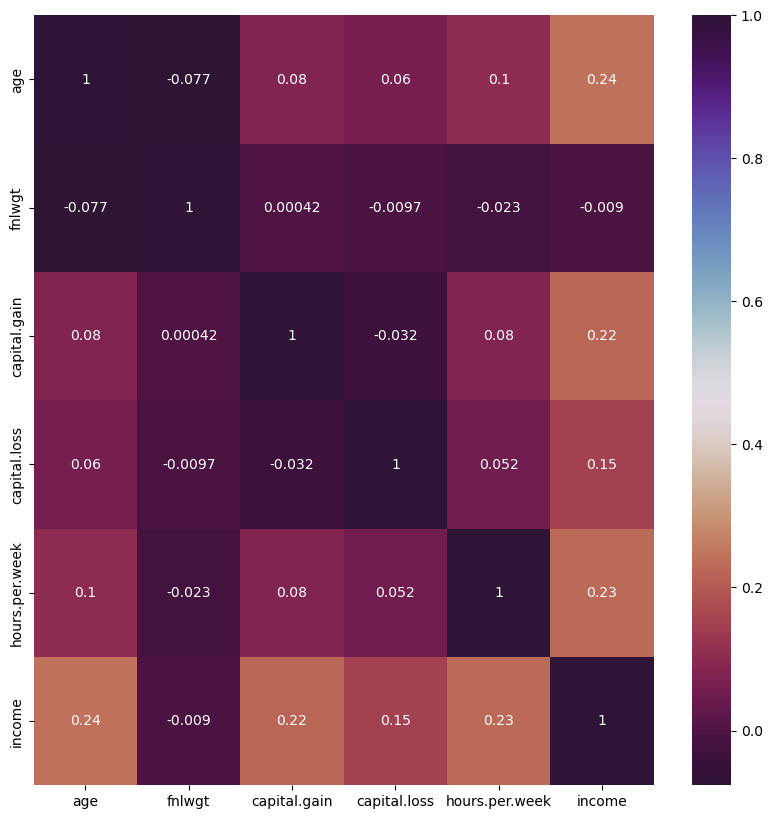

In [7]:
import seaborn as sns
numeric_df = df.select_dtypes(include='number') # only the numeric columns have to be selected
corrmat = numeric_df.corr() # the correlation matrix is calculated
plt.figure(figsize=(10,10)) # the size of the figure is specified
sns.heatmap(corrmat, annot=True, cmap='twilight_shifted_r') # the heatmap is plotted
plt.show()


#### Feature Selection

Now we have to check which features of the dataset exactly contribute to the prediction.

Correlation is used for identifying the relationship between a binary variable (income) and a continuous variable.

In [8]:
columns = ['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']

for column in columns:
    cov_value = np.cov(df['income'], df[column])[0, 1]  # Calculate covariance between income and the current column
    
    # if the value is greater than zero, it is positive or else it is negative correlation
    if cov_value > 0:
        status = "positive correlation"
    else:
        status = "negative correlation"
    
    print(column, ":", cov_value, " - ", status)  # Print column name, covariance value, and correlation status


age : 1.3743984554512918  -  positive correlation
capital.loss : 26.23186750698775  -  positive correlation
capital.gain : 708.3752198325986  -  positive correlation
hours.per.week : 1.1887293270913064  -  positive correlation
fnlwgt : -409.2102101147642  -  negative correlation


Through this we can see that only the "fnlwgt" column has a negative correlation with the income column.

Let us confirm this statement with the use of logistic regression.

In [9]:
import statsmodels.api as sm

X = sm.add_constant(df[['age', 'capital.loss', 'capital.gain', 'hours.per.week', 'fnlwgt']])
y = df['income'] # the target variable is assigned
logistic_model = sm.Logit(y, X) # a logistic regression model instance is created
result = logistic_model.fit() # the model is fitted
print(result.summary()) # print the summary

Optimization terminated successfully.
         Current function value: 0.455527
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30156
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.1882
Time:                        10:25:27   Log-Likelihood:                -13740.
converged:                       True   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.0130      0.089    -56.442      0.000      -5.187      -4.839
age              

Using this report, it could be seen that the all the columns have an impact on the "income" column. However, when analysing the "fnlwgt" column, we know it plays some impact on the "income" column as the coefficient is not zero. However, this impact seems to be insignificant when considering in a practical sitution.

Thus due to its lack of impact, the "fnlwgt" column could be dropped from the feature selection.

In [10]:
df = df.drop('fnlwgt', axis=1)
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


Next we have to perform One Hot Encoding to create binary columns for each categorical value.

In [11]:
categorical_columns = df.columns[df.dtypes == object].tolist() # the columns are converted into a list
df = pd.get_dummies(df, columns=categorical_columns)
df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,0,4356,18,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,0,3900,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,0,3900,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,34,0,3770,45,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,38,0,3770,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,27,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,40,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,58,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Min Max Scaler could be used to provide a value between 0 and 1 for all the numerical columns.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scalable_columns = ['age','capital.gain','capital.loss','hours.per.week'] #columns with numerical values
min_max_scaler = MinMaxScaler() # creating an instance of the Min Max Scaler
scaled_columns = min_max_scaler.fit_transform(df[scalable_columns]) 

# now the values could be assigned back to the respective column in the DataFrame
df['age']=scaled_columns[:,0]
df['capital.gain']=scaled_columns[:,1]
df['capital.loss']=scaled_columns[:,2]
df['hours.per.week']=scaled_columns[:,3]

df

,age,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,0.890411,0.0,1.000000,0.173469,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.506849,0.0,0.895317,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.328767,0.0,0.895317,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
5,0.232877,0.0,0.865473,0.448980,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.287671,0.0,0.865473,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.0,0.000000,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,0.136986,0.0,0.000000,0.377551,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,0.315068,0.0,0.000000,0.397959,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,0.561644,0.0,0.000000,0.397959,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


This is how the final data frame would look like after the preprocessing techniques have been carried out.

### Machine learning algorithms.

#### 1. Naïve Bayes Classifier model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, r2_score, classification_report

gnb_model = GaussianNB() # an instance of the model is created

x = df.drop('income', axis=1) # the input features are defined
y = df['income'] # the output feature(income) is defined

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training split is taken

gnb = gnb_model.fit(x_train, y_train) # the model is trained using the training data
predictions_gnb = gnb.predict(x_test) # the model is tested using the testing inputs

accuracy_gnb = accuracy_score(y_test, predictions_gnb) # the accuracy score is calculated
print(f"Accuracy score is {accuracy_gnb}") # the accuracy is printed

r2_val_gnb = r2_score(y_test, predictions_gnb) # the r2 score is calculated
print(f"r2 score is {r2_val_gnb}") # the r2 score is printed

print(classification_report(y_test,predictions_gnb)) # the classification report is printed

Accuracy score is 0.5609149676777723
r2 score is -1.3317702519926993
              precision    recall  f1-score   support

           0       0.96      0.43      0.60      4515
           1       0.36      0.95      0.52      1518

    accuracy                           0.56      6033
   macro avg       0.66      0.69      0.56      6033
weighted avg       0.81      0.56      0.58      6033



##### 2. Random Forest Classifier Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report

rf_model = RandomForestClassifier(random_state=42) # an instance of the model is created

x = df.drop('income', axis=1) # the input features are defined
y = df['income'] # the output feature (income) is defined

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42) # 70% training split is taken

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed


r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8398219191058066
r2 score is 0.14941105979647828
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15801
           1       0.71      0.61      0.66      5313

    accuracy                           0.84     21114
   macro avg       0.79      0.76      0.78     21114
weighted avg       0.83      0.84      0.84     21114



##### Let us try to increase the accuracy by tuning the hyperparameters.

Changing the training and testing split

In [15]:
rf_model = RandomForestClassifier(random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42) # 80% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.842436800663075
r2 score is 0.15980219809526164
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18096
           1       0.72      0.61      0.66      6034

    accuracy                           0.84     24130
   macro avg       0.80      0.77      0.78     24130
weighted avg       0.84      0.84      0.84     24130



The maximum depth of the decision trees has been assigned and minimal sample split has been included.

Based on the classification report and metrics, the following could be said of the algorithm.
- Class 0 is classified well with high precision, recall and f1- score.
- Class 1 has comparatively low performance.
- Overall it is a balanced performance based on macro average and weighted average.

+ Accuracy of the algorithm is 85.60%.
+ r2 score of the algorithm is 0.226.

Adding parameters such as minimal samples per split and the maximum depth of the decision trees.

In [16]:
rf_model = RandomForestClassifier(min_samples_split=10, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8522171570658931
r2 score is 0.21195545460486664
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18096
           1       0.81      0.53      0.64      6034

    accuracy                           0.85     24130
   macro avg       0.84      0.75      0.78     24130
weighted avg       0.85      0.85      0.84     24130



Tuning the minimum number of samples per split.

In [17]:
rf_model = RandomForestClassifier(min_samples_split=20, max_depth=10, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8520099461251555
r2 score is 0.21085051272966315
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     18096
           1       0.82      0.53      0.64      6034

    accuracy                           0.85     24130
   macro avg       0.84      0.74      0.77     24130
weighted avg       0.85      0.85      0.84     24130



Tuning the maximum depth of the decision trees.

In [18]:
rf_model = RandomForestClassifier(min_samples_split=20, max_depth=20, random_state=42)

x = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42) # 70% training split

rf = rf_model.fit(x_train, y_train) # the model is trained using the training data
predictions_rf = rf.predict(x_test) # the model is tested using the testing inputs

accuracy_rf = accuracy_score(y_test, predictions_rf) # the accuracy score is calculated
print(f"Accuracy is {accuracy_rf}") # the accuracy is printed

r2_val_rf = r2_score(y_test, predictions_rf) # the r2 score is calculated
print(f"r2 score is {r2_val_rf}") # the r2 score is printed

print(classification_report(y_test, predictions_rf)) # the classification report is printed

Accuracy is 0.8547865727310402
r2 score is 0.22565673385738994
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     18096
           1       0.78      0.58      0.67      6034

    accuracy                           0.85     24130
   macro avg       0.83      0.76      0.79     24130
weighted avg       0.85      0.85      0.85     24130

